In [ ]:
#grab a dataset
#This file contains all the flights starting from 1st January 2020 till 31st January 2020. 
#There are around 400,000 rows in this file and 21 feature columns indicating the features of the flight including information 
#about origin airport, destination airport, airplane information, departure time and arrival time.

In [1]:
#setup python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

## load the Data


In [ ]:
df = pd.read_csv('../Datasets/Jan_2020_ontime.csv')

In [ ]:
#make the headings useful such as removing spaces and Upper case
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.head()

In [ ]:
#remove column with no data
df = df.drop('unnamed:_21', axis=1)

In [ ]:
#get descriptive data for the dataset
data = pd.read_html('https://aspmhelp.faa.gov/index.php/ASQP:_Carrier_Codes_and_Names')
df_html = pd.DataFrame(data[0])
df_html.head()

In [ ]:
df_html.columns = df_html.columns.str.lower().str.replace(' ', '_')
df_html.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
#add the air carrier name in the dataframe
Jan2020 = pd.merge(left=df, right=df_html, how='inner', left_on='op_carrier',right_on='iata_code').drop('iata_code', axis=1)
Jan2020 = Jan2020.drop('icao_code', axis=1)
Jan2020.head()

In [ ]:
Jan2020.shape

In [ ]:
#get descriptive data for the dataset
data = pd.read_html('https://www.leonardsguide.com/us-airport-codes.shtml')
df_airport = pd.DataFrame(data[0])
df_airport.rename(columns={0:'airport'}, inplace=True)
df_airport.rename(columns={1:'airport_code'}, inplace=True)
df_airport.head(30)

In [ ]:
df_airport.columns = df_airport.columns.str.strip()

In [ ]:
df_airport.head()

In [ ]:
df_airport['airport_code'].value_counts()


In [ ]:
df_airport.loc[df_airport['airport_code'] == 'IAH']

In [ ]:
df_airport.iloc[218]

In [ ]:
df_airport = df_airport.drop(218)

In [ ]:
Jan2020.columns = Jan2020.columns.str.strip()

In [ ]:
Jan2020.head()

In [ ]:
# add the airport name in the dataframe
Jan2020 = pd.merge(left=Jan2020, right=df_airport, how='left', left_on='dest',right_on='airport_code').drop('airport_code', axis=1)
#Jan2020.rename(columns={'airport_code':'dest_airport'}, inplace=True)
Jan2020.head()

In [ ]:
# add the airport name in the dataframe
Jan2020 = pd.merge(left=Jan2020, right=df_airport, how='left', left_on='origin',right_on='airport_code').drop('airport_code', axis=1)
Jan2020.head()

In [ ]:
Jan2020.rename(columns={'airport_x':'origin_airport'}, inplace=True)
Jan2020.rename(columns={'airport_y':'dest_airport'}, inplace=True)


In [ ]:
Jan2020.shape

In [ ]:
data = df['origin'].unique()

In [ ]:
check = Jan2020['origin'].unique()

In [ ]:
unmatched_items_10 = [d for d in data if d not in check]
unmatched_items_10

In [ ]:
data2 = df['dest'].unique()
check2 = Jan2020['dest'].unique()

unmatched_items_11 = [d for d in data2 if d not in check2]
unmatched_items_11

In [ ]:
#classify flight distance into discrete buckets
flight_distance = []

for i in Jan2020['distance']:
    if i < 800:
        flight_distance.append('Short Haul')
    elif i > 800 and i < 2200:
        flight_distance.append('Medium Haul')
    else:
        flight_distance.append('Long Haul')
        
Jan2020['flight_distance'] = flight_distance

In [ ]:
Jan2020.head()

In [ ]:
df.shape

In [ ]:
Jan2020.shape

In [ ]:
df.day_of_week.unique()

In [ ]:
#create mapping field for days of the week.
mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',4: 'Thursday', 5: 'Friday', 6: 'Saturday',7: 'Sunday'}

Jan2020['dayofweek_name'] = Jan2020['day_of_week'].map(mapping)

In [ ]:
Jan2020.head()

In [ ]:
Jan2020.shape 



## Inspect the data

In [ ]:
Jan2020.info()

In [ ]:
Jan2020.isna().sum()

In [ ]:
Jan2020.describe().T

In [ ]:
#drop duplicate column
Jan2020 = Jan2020.drop('op_unique_carrier', axis=1)

In [ ]:
# The data consist of 17 different airlines.
Jan2020.op_carrier.unique()

## Missing Values

In [ ]:
#setting missing airport names to Miscellaneous for analysis (we need to exclude from some of the charts), keep in df.

In [ ]:
Jan2020['origin_airport'].fillna('Misc.', axis=0, inplace=True)

In [ ]:
Jan2020['dest_airport'].fillna('Misc.', axis=0, inplace=True)

In [ ]:
Jan2020.isna().sum()

In [ ]:
sns.distplot(Jan2020['dep_time'], bins=60, kde=True,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})

plt.title("This is a flat mountain with Density Line")
plt.xlabel("Bins containing a range for the data")
plt.ylabel("The top of the Bins")
plt.show()

In [ ]:
#median or average can be applied here as they are very close. It is uniform distribution.

In [ ]:
sns.distplot(Jan2020['dep_del15'], bins=60, kde=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})

plt.title("Most values are zero")
plt.xlabel("Bins containing a range for the data")
plt.ylabel("The top of the Bins")
plt.show()

In [ ]:
#median values applied here as most values in dataset are zero

In [ ]:
sns.distplot(Jan2020['arr_time'], bins=60, kde=True,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})

plt.title("This is a mostly flat mountain with some zeros")
plt.xlabel("Bins containing a range for the data")
plt.ylabel("The top of the Bins")
plt.show()

In [ ]:
due to some zeros, I would prefer to use the mean with this distribution.

In [ ]:
sns.distplot(Jan2020['arr_del15'], bins=60, kde=False,
                  color='skyblue', hist_kws={"linewidth": 15,'alpha':1})

plt.title("Most values are zero")
plt.xlabel("Bins containing a range for the data")
plt.ylabel("The top of the Bins")
plt.show()

In [ ]:
#use median here are most values are zero.

In [ ]:
lots_missing = ['dep_time', 'dep_del15', 'arr_del15']

for col in lots_missing:
    Jan2020[col] = Jan2020[col].fillna(Jan2020[col].median())

Jan2020[lots_missing].isna().sum()

In [ ]:
lots_missing = ['arr_time']

for col in lots_missing:
    Jan2020[col] = Jan2020[col].fillna(Jan2020[col].mean())

Jan2020[lots_missing].isna().sum()

In [ ]:
# to handle tail number, it will not be used for the analysis so will drop it from the dataframe

In [ ]:
Jan2020 = Jan2020.drop('tail_num', axis=1)

In [ ]:
Jan2020.isna().sum()

In [ ]:
!dir

In [ ]:
# Let's save clean data for later use

Jan2020.to_csv('cleaned_Jan2020_airline_delay.csv', index=False)

## Exploratory Data Analysis

In [4]:
!cd

C:\Users\mdeane\PythonDA\python-class\Lesson_6


In [10]:
Jan2020 = pd.read_csv('cleaned_Jan2020_airline_delay.csv')

In [61]:
Jan2020.head()

,day_of_month,day_of_week,op_carrier_airline_id,op_carrier,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,dest_airport_id,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,air_carrier_name,origin_airport,dest_airport,flight_distance,dayofweek_name,flight_Time_blk,flight_time_blk
0,1,3,20366,EV,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,ExpressJet Airlines,Green Bay,"Chicago, O'Hare International Airport Airport",Short Haul,Wednesday,Morning,Morning
1,1,3,20366,EV,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,ExpressJet Airlines,"Chicago, O'Hare International Airport Airport",Tulsa,Short Haul,Wednesday,Morning,Morning
2,1,3,20366,EV,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,ExpressJet Airlines,Knoxville,Newark International Airport,Short Haul,Wednesday,Early Even,Early Even
3,1,3,20366,EV,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,ExpressJet Airlines,"Houston, George Bush Intercontinental Airport",Baton Rouge,Short Haul,Wednesday,Early Even,Early Even
4,1,3,20366,EV,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,ExpressJet Airlines,"Houston, George Bush Intercontinental Airport",Richmond,Medium Haul,Wednesday,Morning,Morning


In [28]:
Jan2020.dep_time_blk.unique()

array(['1000-1059', '1800-1859', '0600-0659', '1600-1659', '1400-1459',
       '1900-1959', '1100-1159', '0700-0759', '2100-2159', '1500-1559',
       '0900-0959', '1700-1759', '1200-1259', '0800-0859', '0001-0559',
       '2000-2059', '1300-1359', '2200-2259', '2300-2359'], dtype=object)

In [29]:
#move up to load data

In [45]:
#classify flight distance into discrete buckets
flight_time = []

for i in Jan2020['dep_time']:
    if i >= 0 and i <= 600:
        flight_time.append('Overnight')
    elif i >= 600 and i <= 900:
        flight_time.append('Early Morn') 
    elif i >= 900 and i <= 1200:
        flight_time.append('Morning') 
    elif i >= 1200 and i <= 1400:
        flight_time.append('Lunch') 
    elif i >= 1400 and i <= 1700:
        flight_time.append('Afternoon') 
    elif i >= 1700 and i <= 2000:
        flight_time.append('Early Even')
    else:
        flight_time.append('Evening')
        
Jan2020['flight_time_blk'] = flight_time

In [59]:
# the dep_time_blk does not completely equal the correct buckets based on the dep time field.
Jan2020[Jan2020['flight_time_blk'] == 'Evening'].groupby(['dep_time_blk'])['flight_time_blk'].count()

dep_time_blk
0001-0559       49
0600-0659       12
0700-0759       15
0800-0859        6
0900-0959        6
1000-1059       12
1100-1159        9
1200-1259       15
1300-1359       32
1400-1459       59
1500-1559       91
1600-1659      165
1700-1759      496
1800-1859     1141
1900-1959     4390
2000-2059    26156
2100-2159    18558
2200-2259    13790
2300-2359     3809
Name: flight_time_blk, dtype: int64

In [34]:
Jan2020.shape

(607346, 26)

In [ ]:
#It made more sense to use total delayed to see the delay of major airports, not enough data for some airports

In [13]:
# We can see top 10 origin airports and the percentage of delayed flight vs total flights.
df_org=pd.DataFrame(Jan2020.groupby([Jan2020['origin_airport'].str[:20],"dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["Origin","Not_Delayed","Delayed"])
df_org["PercentOfDelayed"]=pd.to_numeric(df_org.Delayed /( df_org.Delayed+ df_org.Not_Delayed))
df_org.sort_values(by="Not_Delayed",ascending=False,inplace=True)
#df_org.sort_values(by="PercentOfDelayed",ascending=False,inplace=True)
df_org[df_org['Origin'] != 'Misc.'].head(10)

,Origin,Not_Delayed,Delayed,PercentOfDelayed
8,Atlanta Hartsfield I,28821,3366,0.104576
31,"Chicago, O'Hare Inte",22103,3584,0.139526
40,Dallas/Fort Worth In,20503,3851,0.158126
43,Denver International,17959,2446,0.119873
27,Charlotte/Douglas In,17214,2788,0.139386
94,Los Angeles Internat,15489,2305,0.129538
128,"Phoenix, Phoenix Sky",13385,1948,0.127046
71,"Houston, George Bush",13247,1546,0.104509
88,"Las Vegas, Las Vegas",12442,1742,0.122814
112,"New York, La Guardia",11705,2131,0.154019


In [15]:
# We can see top 10 origin airports and the percentage of delayed flight vs total flights.
df_dest=pd.DataFrame(Jan2020.groupby([Jan2020['dest_airport'].str[:20],"arr_del15"])["origin_airport_id"].count().unstack("arr_del15").reset_index().values,columns=["Dest.","Not_Delayed","Delayed"])
df_dest["PercentOfDelayed"]=pd.to_numeric(df_dest.Delayed /( df_dest.Delayed+ df_org.Not_Delayed))
df_dest.sort_values(by="Not_Delayed",ascending=False,inplace=True)
#df_org.sort_values(by="PercentOfDelayed",ascending=False,inplace=True)
df_dest[df_dest['Dest.'] != 'Misc.'].head(10)

,Dest.,Not_Delayed,Delayed,PercentOfDelayed
8,Atlanta Hartsfield I,28932,3258,0.101562
31,"Chicago, O'Hare Inte",20974,4687,0.174953
40,Dallas/Fort Worth In,19859,4480,0.179322
43,Denver International,17924,2474,0.121079
27,Charlotte/Douglas In,16408,3587,0.172444
94,Los Angeles Internat,15461,2338,0.131149
128,"Phoenix, Phoenix Sky",13452,1873,0.122755
71,"Houston, George Bush",12899,1893,0.125033
88,"Las Vegas, Las Vegas",12574,1612,0.114700
112,"New York, La Guardia",12027,1809,0.133861


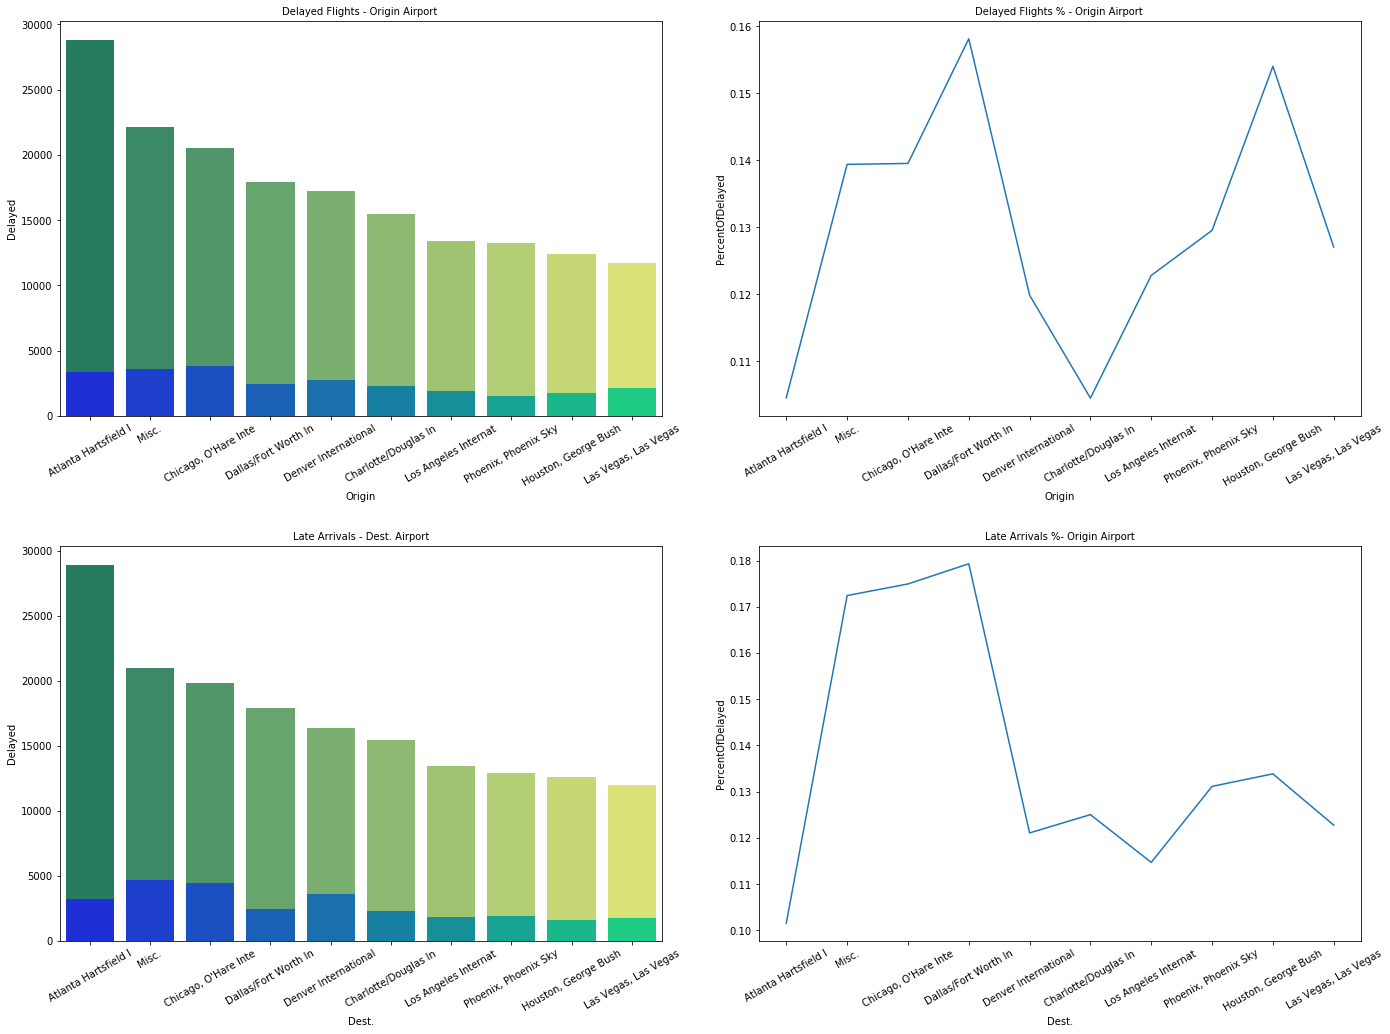

In [17]:
#Create combo chart
fig, ax = plt.subplots(2,2, figsize=(20,15))


sns.barplot(x='Origin', y='Not_Delayed', data = df_org[df_org['Origin'] != 'Misc.'].head(10), palette='summer', ax=ax[0,0])
sns.barplot(x='Origin', y='Delayed', data = df_org[df_org['Origin'] != 'Misc.'].head(10), palette='winter', ax=ax[0,0])
sns.lineplot(x='Origin', y='PercentOfDelayed', data = df_org[df_org['Origin'] != 'Misc.'].head(10), sort=True,  ax=ax[0,1])


sns.barplot(x='Dest.', y='Not_Delayed', data = df_dest[df_dest['Dest.'] != 'Misc.'].head(10), palette='summer', ax=ax[1,0])
sns.barplot(x='Dest.', y='Delayed', data = df_dest[df_dest['Dest.'] != 'Misc.'].head(10), palette='winter', ax=ax[1,0])
sns.lineplot(x='Dest.', y='PercentOfDelayed', data = df_dest[df_dest['Dest.'] != 'Misc.'].head(10), sort=True,  ax=ax[1,1])

ax[0,0].set_title('Delayed Flights - Origin Airport ', fontdict={'fontsize': 10})
ax[1,0].set_title('Late Arrivals - Dest. Airport', fontdict={'fontsize': 10})
ax[0,1].set_title('Delayed Flights % - Origin Airport ', fontdict={'fontsize': 10})
ax[1,1].set_title('Late Arrivals %- Origin Airport', fontdict={'fontsize': 10})
       
ax[0,0].set_xticklabels(df_org['Origin'],rotation=30)
ax[0,1].set_xticklabels(df_org['Origin'],rotation=30)
ax[1,0].set_xticklabels(df_dest['Dest.'],rotation=30)
ax[1,1].set_xticklabels(df_dest['Dest.'],rotation=30)

fig.tight_layout(pad=3.0)

plt.show()

In [43]:
# We can see top 10 departure time blocks and the percentage of delayed flight vs total flights.
#It seems most of the flights are in the morning. But higher percentage of delay occurs after 1700.
df_depblk=pd.DataFrame(Jan2020.groupby(["dep_time_blk","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["dep_time_blk","Not_Delayed","Delayed"])
df_depblk["PercentOfDelayed"]=pd.to_numeric(df_depblk.Delayed /( df_depblk.Delayed+ df_depblk.Not_Delayed))
df_depblk.sort_values(by="PercentOfDelayed",ascending=False,inplace=True)
df_depblk.head(15)

,dep_time_blk,Not_Delayed,Delayed,PercentOfDelayed
14,1900-1959,27114,5945,0.179830
13,1800-1859,28928,6219,0.176943
15,2000-2059,24246,5064,0.172774
12,1700-1759,33063,6725,0.169021
16,2100-2159,15783,3167,0.167124
11,1600-1659,30183,5998,0.165778
10,1500-1559,30318,5794,0.160445
9,1400-1459,30127,5668,0.158346
17,2200-2259,12111,2124,0.149210
8,1300-1359,29476,5092,0.147304


In [46]:
# We can see top 10 departure time blocks and the percentage of delayed flight vs total flights.
#It seems most of the flights are in the morning. But higher percentage of delay occurs after 1700.
df_timeblk=pd.DataFrame(Jan2020.groupby(["flight_time_blk","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["flight_time_blk","Not_Delayed","Delayed"])
df_timeblk["PercentOfDelayed"]=pd.to_numeric(df_timeblk.Delayed /( df_timeblk.Delayed+ df_timeblk.Not_Delayed))
df_timeblk.sort_values(by="PercentOfDelayed",ascending=False,inplace=True)
df_timeblk.head(10)

,flight_time_blk,Not_Delayed,Delayed,PercentOfDelayed
3,Evening,52929,15882,0.230806
1,Early Even,86346,18484,0.176324
0,Afternoon,89863,16881,0.158145
4,Lunch,67363,10168,0.131148
5,Morning,95681,12421,0.114901
2,Early Morn,104640,6602,0.059348
6,Overnight,28640,1446,0.048062


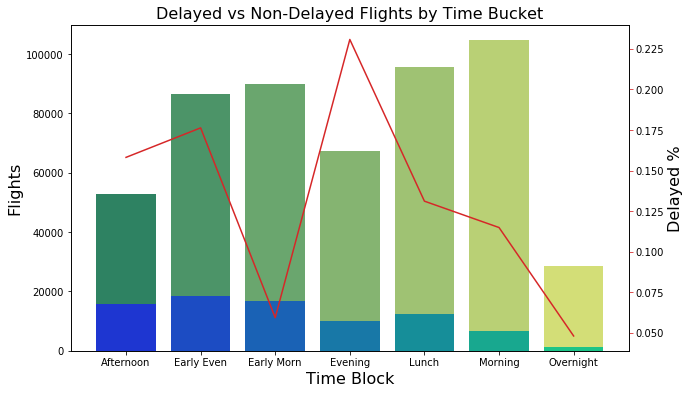

In [42]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Delayed vs Non-Delayed Flights by Time Bucket', fontsize=16)
ax1 = sns.barplot(x='flight_time_blk', y='Not_Delayed', data = df_timeblk, palette='summer')
ax1 = sns.barplot(x='flight_time_blk', y='Delayed', data = df_timeblk, palette='winter')
ax1.set_xlabel('Time Block', fontsize=16)
ax1.set_ylabel('Flights', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2 = sns.lineplot(x='flight_time_blk', y='PercentOfDelayed', data = df_timeblk, sort=True, color=color)
ax2.set_ylabel('Delayed %', fontsize=16)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

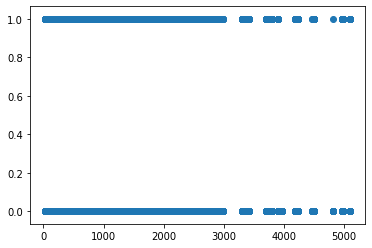

In [19]:
#From this plot we can see that there is not a clear relationship between distance and getting delays. 
plt.scatter(Jan2020["distance"],df["dep_del15"])
plt.show()

In [20]:
#put flight time into buckets and still not clear pattern.

# Its clearly seen that most of the flights are on the 4th day. Nearly %20 of flights are delayed of 6th day.
df_flt=pd.DataFrame(Jan2020.groupby(["flight_distance","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["FlightType","Not_Delayed","Delayed"])
df_flt["PercentOfDelayed"]=pd.to_numeric(df_flt.Delayed /( df_flt.Delayed+ df_flt.Not_Delayed))
df_flt.sort_values(by="Not_Delayed",ascending=False,inplace=True)
df_flt

,FlightType,Not_Delayed,Delayed,PercentOfDelayed
2,Short Haul,317155,47469,0.130186
1,Medium Haul,184797,30606,0.142087
0,Long Haul,23510,3809,0.139427


In [21]:
# We can see by airlines and the percentage of delayed flight vs total flights.
df_air_d=pd.DataFrame(Jan2020.groupby([Jan2020['air_carrier_name'].str[:20],"dep_del15"])["op_carrier"].count().unstack("dep_del15").reset_index().values,columns=["Airline","Not_Delayed","Delayed"])
df_air_d["PercentOfDelayed"]=pd.to_numeric(df_air_d.Delayed /( df_air_d.Delayed+ df_air_d.Not_Delayed))
#df_org.sort_values(by="Not_Delayed",ascending=False,inplace=True)
df_air_d.sort_values(by="PercentOfDelayed",ascending=False,inplace=True)
df_air_d.head(17)

,Airline,Not_Delayed,Delayed,PercentOfDelayed
10,Jetstream Intl,19653,4656,0.191534
0,Alaska Airlines,17247,3863,0.182994
1,Allegiant Air LLC,6398,1376,0.177000
5,Envoy Air,21901,4299,0.164084
11,"Mesa Airlines, Inc.",15034,2802,0.157098
13,Skywest Airlines,60324,10836,0.152277
7,"Frontier Airlines, I",10579,1888,0.151440
9,Jetblue Airways Corp,20974,3735,0.151159
2,American Airlines,65276,11000,0.144213
15,"Spirit Airlines, Inc",15074,2403,0.137495


In [22]:
# We can see by airlines and the percentage of late arrival flights flight vs total flights.
df_late=pd.DataFrame(Jan2020.groupby([Jan2020['air_carrier_name'].str[:20],"arr_del15"])["op_carrier"].count().unstack("arr_del15").reset_index().values,columns=["Airline","Not_Delayed","Delayed"])
df_late["PercentOfLateArrivals"]=pd.to_numeric(df_late.Delayed /( df_late.Delayed+ df_late.Not_Delayed))
#df_org.sort_values(by="Not_Delayed",ascending=False,inplace=True)
df_late.sort_values(by="PercentOfLateArrivals",ascending=False,inplace=True)
df_late.head(17)

,Airline,Not_Delayed,Delayed,PercentOfLateArrivals
10,Jetstream Intl,19143,5166,0.212514
0,Alaska Airlines,16717,4393,0.208100
1,Allegiant Air LLC,6236,1538,0.197839
5,Envoy Air,21221,4979,0.190038
11,"Mesa Airlines, Inc.",14718,3118,0.174815
6,ExpressJet Airlines,8963,1601,0.151552
13,Skywest Airlines,60468,10692,0.150253
2,American Airlines,64928,11348,0.148775
9,Jetblue Airways Corp,21034,3675,0.148731
7,"Frontier Airlines, I",10672,1795,0.143980


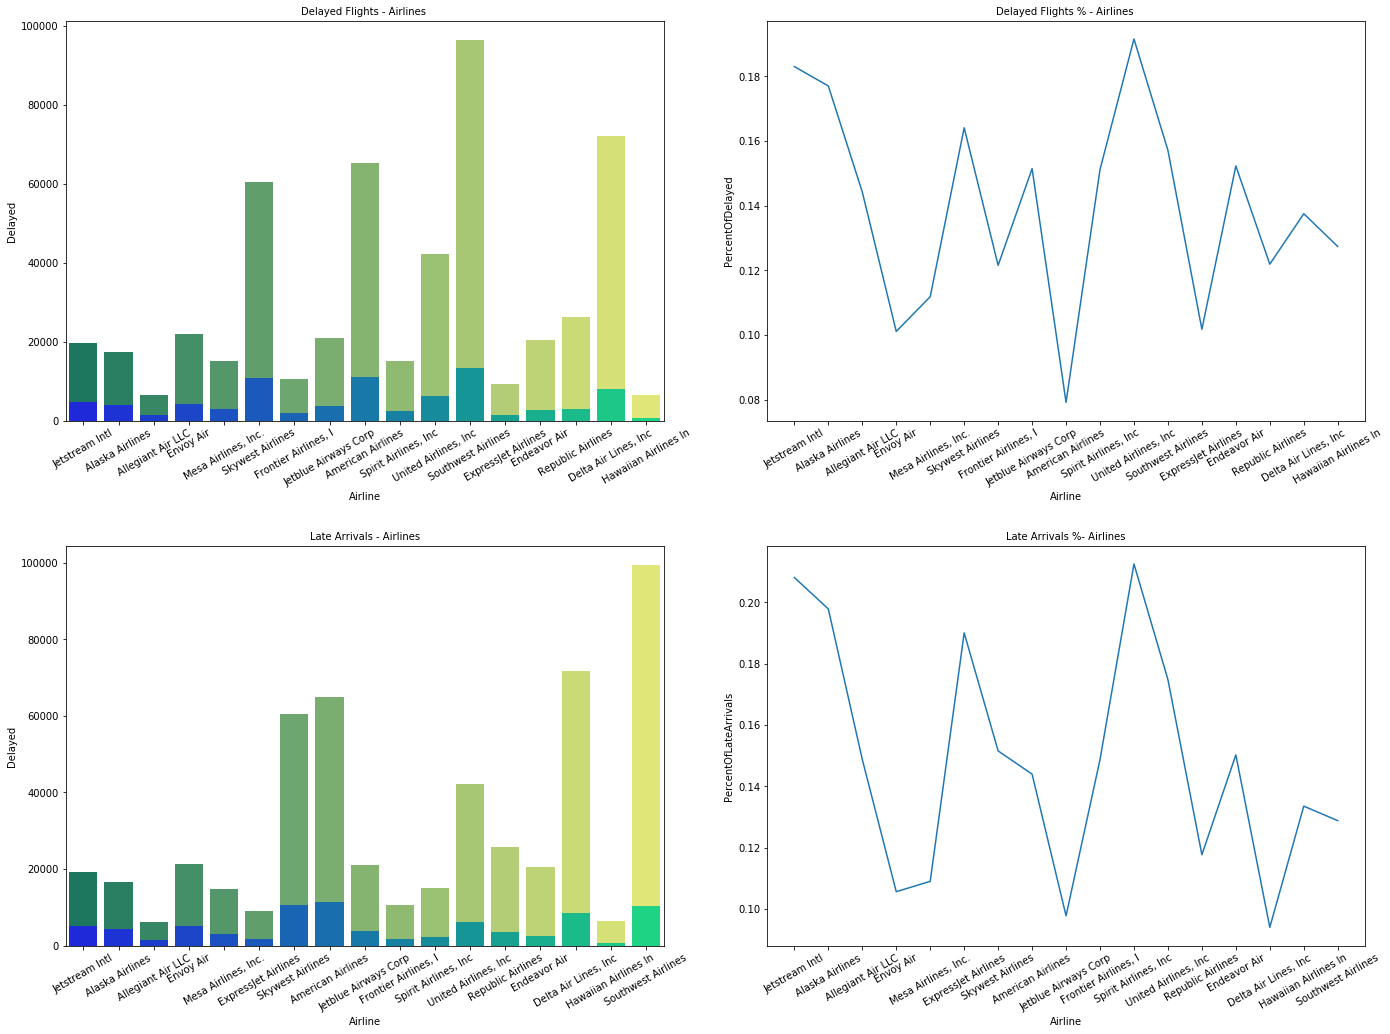

In [23]:
#Create combo chart
fig, ax = plt.subplots(2,2, figsize=(20,15))


sns.barplot(x='Airline', y='Not_Delayed', data = df_air_d, palette='summer', ax=ax[0,0])
sns.barplot(x='Airline', y='Delayed', data = df_air_d, palette='winter', ax=ax[0,0])
sns.lineplot(x='Airline', y='PercentOfDelayed', data = df_air_d, sort=True,  ax=ax[0,1])


sns.barplot(x='Airline', y='Not_Delayed', data = df_late, palette='summer', ax=ax[1,0])
sns.barplot(x='Airline', y='Delayed', data = df_late, palette='winter', ax=ax[1,0])
sns.lineplot(x='Airline', y='PercentOfLateArrivals', data = df_late, sort=True,  ax=ax[1,1])

ax[0,0].set_title('Delayed Flights - Airlines ', fontdict={'fontsize': 10})
ax[1,0].set_title('Late Arrivals - Airlines', fontdict={'fontsize': 10})
ax[0,1].set_title('Delayed Flights % - Airlines ', fontdict={'fontsize': 10})
ax[1,1].set_title('Late Arrivals %- Airlines', fontdict={'fontsize': 10})
       
ax[0,0].set_xticklabels(df_air_d['Airline'],rotation=30)
ax[0,1].set_xticklabels(df_air_d['Airline'],rotation=30)
ax[1,0].set_xticklabels(df_late['Airline'],rotation=30)
ax[1,1].set_xticklabels(df_late['Airline'],rotation=30)

fig.tight_layout(pad=3.0)

plt.show()

In [25]:
# Its clearly seen that most of the flights are on the 4th day. Nearly %20 of flights are delayed of 6th day.
df_dow=pd.DataFrame(Jan2020.groupby(["dayofweek_name","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["DayofWeek","Not_Delayed","Delayed"])
df_dow["PercentOfDelayed"]=pd.to_numeric(df_dow.Delayed /( df_dow.Delayed+ df_dow.Not_Delayed))
df_dow.sort_values(by="Not_Delayed",ascending=False,inplace=True)
df_dow

,DayofWeek,Not_Delayed,Delayed,PercentOfDelayed
4,Thursday,89743,13933,0.134390
0,Friday,87942,15870,0.152873
6,Wednesday,87240,9559,0.098751
1,Monday,71213,11176,0.135649
5,Tuesday,69086,7558,0.098612
3,Sunday,67180,11326,0.144269
2,Saturday,53058,12462,0.190201


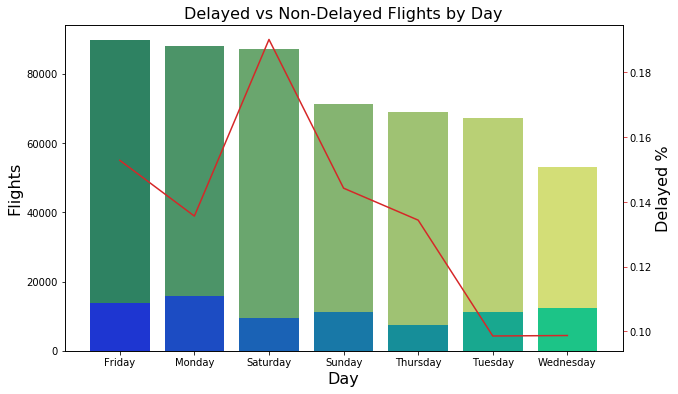

In [40]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Delayed vs Non-Delayed Flights by Day', fontsize=16)
ax1 = sns.barplot(x='DayofWeek', y='Not_Delayed', data = df_dow, palette='summer')
ax1 = sns.barplot(x='DayofWeek', y='Delayed', data = df_dow, palette='winter')
ax1.set_xlabel('Day', fontsize=16)
ax1.set_ylabel('Flights', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2 = sns.lineplot(x='DayofWeek', y='PercentOfDelayed', data = df_dow, sort=True, color=color)
ax2.set_ylabel('Delayed %', fontsize=16)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

## Conclusion






This was a very useful dataset as it allowed a few columns to be created, some cleaning was required and there are some nice patterns to explore in the dataset.

The next steps would be to run some multi-dimensional analysis on top of what has been found in the opening exploratory analysis.

1. clear pattern of delays based on time buckets

2. clear patterns with airlines and airports on delays

3. No real evidence of delay pattern based on the flight distance in this dataset.


Some of the pre-bucketed data not accurate so as the alignment of departure time to the departure time buckets. The time bucket which I created seems very useful.

The merging of airport names to the dataset was not perfect but only affected less than 5 percent of the dataset. For the airport based analysis, I excluded this from the analysis.

## Future Work

In [62]:
# multi-dimensional analysis would be useful, combining airlines, airports, time buckets where there are distinct patterns

In [63]:
# 5 hypotheses